## Read the data

In [2]:
import pandas as pd
import numpy as np
sales_xujiahui=pd.read_excel("E:/Python AI/HW3/徐家汇卖价.xlsx")
rent_xujiahui=pd.read_excel("E:/Python AI/HW3/徐家汇租价.xlsx")
sales_longhua=pd.read_csv("E:/Python AI/HW3/龙华卖价.csv",encoding="gbk")
rent_longhua=pd.read_csv("E:/Python AI/HW3/龙华租价.csv", encoding="gbk")
sales_kangjian=pd.read_csv("E:/Python AI/HW3/康健卖价.csv", encoding="gbk")
rent_kangjian=pd.read_csv("E:/Python AI/HW3/康健租价.csv", encoding="gbk")

## Clean the data

In [4]:
sales_xujiahui

,面积,总价,单价
0,146.75㎡,1298万,88449元/㎡
1,166.92㎡,1580万,94656元/㎡
2,93.83㎡,1080万,115101元/㎡
3,47.1㎡,478万,101486元/㎡
4,54.29㎡,496万,91361元/㎡
...,...,...,...
1195,125.32㎡,998万,79636元/㎡
1196,105㎡,1010万,96190元/㎡
1197,181.89㎡,2160万,118753元/㎡
1198,135.56㎡,1280万,94423元/㎡


In [5]:
sales_dfs = [sales_xujiahui, sales_longhua, sales_kangjian]
rent_dfs = [rent_xujiahui, rent_longhua, rent_kangjian]

In [6]:
import re
def extract_number(text):
    match = re.search(r'(\d+\.?\d*)', str(text))
    if match:
        return float(match.group(1))  
    return None  

In [7]:
for df in sales_dfs:
    df['面积'] = df['面积'].apply(extract_number)
    df['总价'] = df['总价'].apply(extract_number)
    df['单价'] = df['单价'].apply(extract_number)
for df in rent_dfs:
    df['面积'] = df['面积'].apply(extract_number)
    df['价格'] = df['价格'].apply(extract_number)

In [8]:
rent_longhua

,价格,面积
0,100000.0,440.0
1,10500.0,107.0
2,3900.0,32.0
3,40000.0,237.0
4,3900.0,32.0
...,...,...
1195,11000.0,96.0
1196,6800.0,66.0
1197,22500.0,208.0
1198,6300.0,55.0


## Merge the data

In [10]:
sales_dict = {
    "xujiahui": sales_xujiahui,
    "longhua": sales_longhua,
    "kangjian": sales_kangjian
}
rent_dict = {
    "xujiahui": rent_xujiahui,
    "longhua": rent_longhua,
    "kangjian": rent_kangjian
}
for location, df in sales_dict.items():
    df["位置"] = location
for location, df in rent_dict.items():
    df["位置"] = location

In [11]:
rent_kangjian

,面积,价格,位置
0,44.0,4600.0,kangjian
1,34.0,3500.0,kangjian
2,36.0,3300.0,kangjian
3,37.0,3100.0,kangjian
4,43.0,3800.0,kangjian
...,...,...,...
923,144.0,16500.0,kangjian
924,101.0,13000.0,kangjian
925,204.0,20000.0,kangjian
926,181.0,23000.0,kangjian


In [12]:
sales = pd.concat(sales_dict.values(), axis=0, ignore_index=True)
rent = pd.concat(rent_dict.values(), axis=0, ignore_index=True)

In [13]:
sales

,面积,总价,单价,位置
0,146.75,1298.0,88449.0,xujiahui
1,166.92,1580.0,94656.0,xujiahui
2,93.83,1080.0,115101.0,xujiahui
3,47.10,478.0,101486.0,xujiahui
4,54.29,496.0,91361.0,xujiahui
...,...,...,...,...
3595,77.00,355.0,46103.0,kangjian
3596,88.00,450.0,51136.0,kangjian
3597,137.84,1088.0,78932.0,kangjian
3598,52.00,255.0,49038.0,kangjian


## Basic data description

In [15]:
sales.describe()

,面积,总价,单价
count,3599.000000,3600.000000,3600.000000
mean,106.522634,988.326167,83011.708611
std,58.276824,917.949540,30062.484524
min,3.000000,148.000000,32554.000000
25%,63.850000,398.000000,60954.000000
50%,99.170000,775.000000,78918.000000
75%,135.245000,1250.000000,97798.500000
max,476.890000,10888.000000,228312.000000


It is obvious that the data about sales_prices has outliners. The minimum area is 3, which is impossible. From the count perspective, it seems that there is still a missing value in the area.

Text(0, 0.5, 'total price')

D:\CONDA\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\CONDA\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\CONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\CONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


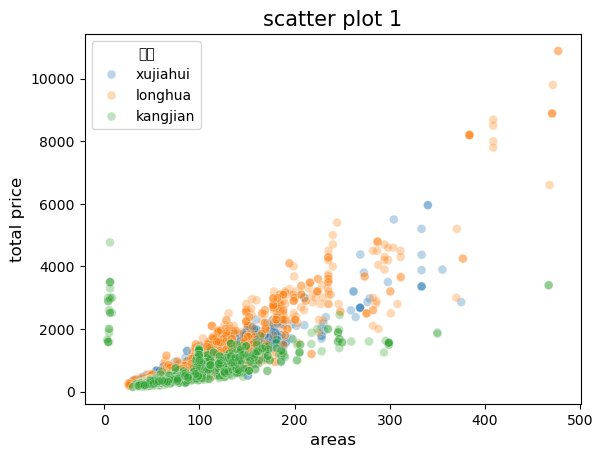

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# a scatter plot about the relationship between areas and total price
# to know more about the outliners
sns.scatterplot(
    data=sales,
    x="面积",
    y="总价",
    hue="位置",  
    alpha=0.3,   
    s=40         
)

plt.title("scatter plot 1", fontsize=15)
plt.xlabel("areas", fontsize=12)
plt.ylabel("total price", fontsize=12)


kangjian's outliners are obvious.

In [19]:
rent.describe()

,面积,价格
count,3328.000000,3328.000000
mean,101.883113,13285.620192
std,87.761980,18037.646397
min,15.000000,1500.000000
25%,48.000000,5000.000000
50%,71.000000,7350.000000
75%,127.000000,14500.000000
max,1103.000000,200000.000000


The maximum of the areas seems 'cute'.

Text(0, 0.5, 'total price')

D:\CONDA\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\CONDA\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\CONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\CONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


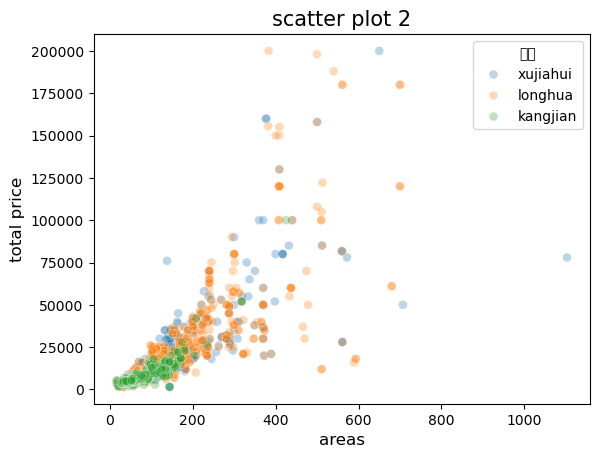

In [21]:
sns.scatterplot(
    data=rent,
    x="面积",
    y="价格",
    hue="位置",  
    alpha=0.3,   
    s=40         
)

plt.title("scatter plot 2", fontsize=15)
plt.xlabel("areas", fontsize=12)
plt.ylabel("total price", fontsize=12)

## Calculation

The housing price per m2 is already in the data, which is directly downloaded from the website. There is no need to calculate by $\frac{Totalprice}{areas}$.

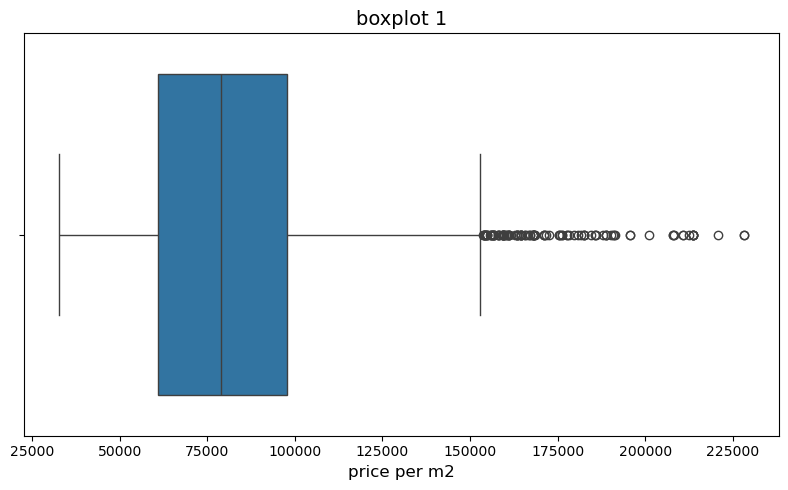

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales["单价"]) 
plt.title("boxplot 1", fontsize=14)
plt.xlabel("price per m2", fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
rent['单价'] = rent['价格'] / rent['面积'] 

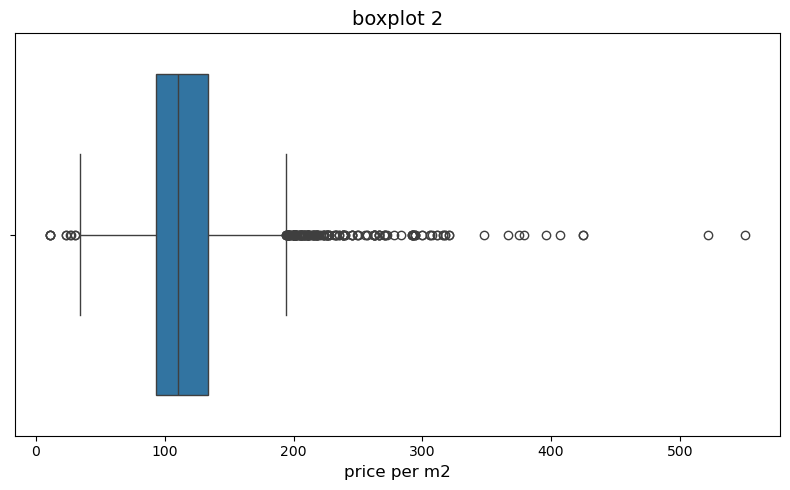

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=rent["单价"]) 
plt.title("boxplot 2", fontsize=14)
plt.xlabel("price per m2", fontsize=12)
plt.tight_layout()
plt.show()

We can know from both box plots that some extreme high outliners still exist.

In [28]:
sales_median = sales.groupby('位置').median()
sales_median = sales_median.rename_axis('位置').reset_index()

In [29]:
sales_median

,位置,面积,总价,单价
0,kangjian,72.650,385.0,54781.0
1,longhua,109.410,969.0,89623.5
2,xujiahui,110.895,899.0,88169.5


In [30]:
rent_median = rent.groupby('位置').median()
rent_median = rent_median.rename_axis('位置').reset_index()
rent_median

,位置,面积,价格,单价
0,kangjian,58.0,5500.0,100.00000
1,longhua,75.0,8400.0,122.44898
2,xujiahui,94.0,9900.0,110.00000


In [31]:
price_rent_ratio= sales_median['单价']/rent_median['单价']

In [32]:
price_rent_ratio

0    547.810000
1    731.925250
2    801.540909
Name: 单价, dtype: float64

## Figure A

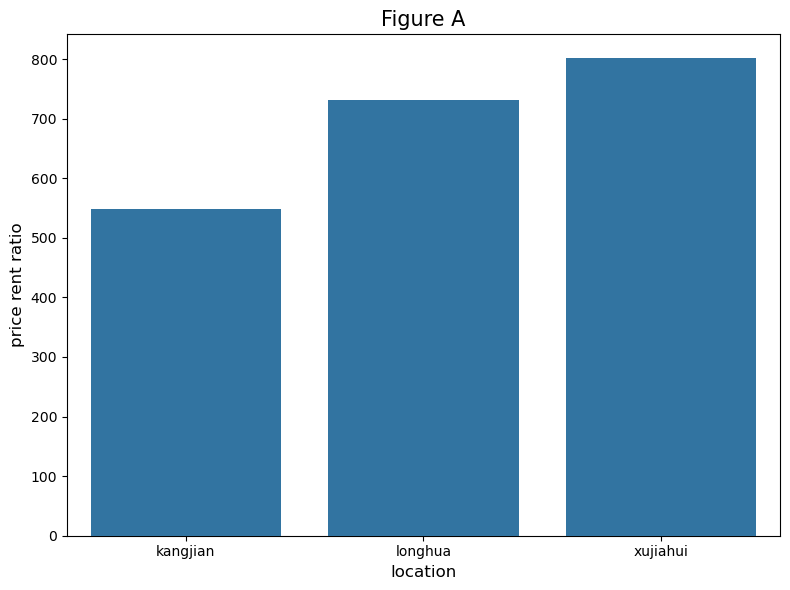

In [34]:
ratio_df = pd.DataFrame({
    "location": sales_median["位置"],  
    "price rent ratio": price_rent_ratio   
})
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ratio_df, 
    x="location", 
    y="price rent ratio",   
    zorder=3  
)

plt.title("Figure A", fontsize=15)
plt.xlabel("location", fontsize=12)
plt.ylabel("price rent ratio", fontsize=12)
plt.tight_layout()
plt.show()

## Data science modeling

In order to quantify the positions for calculation purposes, we will set Kangheng, Longhua and Xujiahui as 1, 2, and 3 respectively.

In [37]:
import statsmodels.api as sm
location_mapping = {
    'kangjian': 1,
    'longhua': 2,
    'xujiahui': 3
}

In [38]:
def statsmodels_regression(data):
    df = data.copy()
    df['位置编码'] = df['位置'].map(location_mapping)
    X = sm.add_constant(df[['位置编码', '面积']])  
    y = df['单价']  

    model = sm.OLS(y, X).fit()
    print(model.summary())  
    return model

In [39]:
sales = sales.dropna(axis=0, how='any')
model1=statsmodels_regression(sales)

                            OLS Regression Results                            
Dep. Variable:                     单价   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1039.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:19:45   Log-Likelihood:                -41396.
No. Observations:                3599   AIC:                         8.280e+04
Df Residuals:                    3596   BIC:                         8.282e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.276e+04   1214.298     26.978      0.0

In [40]:
model2=statsmodels_regression(rent)

                            OLS Regression Results                            
Dep. Variable:                     单价   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           6.65e-79
Time:                        17:19:45   Log-Likelihood:                -17048.
No. Observations:                3328   AIC:                         3.410e+04
Df Residuals:                    3325   BIC:                         3.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.8903      2.040     47.013      0.0

In [41]:
sales['位置编码'] = sales['位置'].map(location_mapping)
rent['位置编码'] = rent['位置'].map(location_mapping)
sales_X = sm.add_constant(sales[['位置编码', '面积']])
sales['预测租价（线性模型）'] = model2.predict(sales_X)
sales['房价租金比（线性模型）'] = sales['单价'] / sales['预测租价（线性模型）']

rent_X = sm.add_constant(rent[['位置编码', '面积']])
rent['预测卖价（线性模型）'] = model1.predict(rent_X)
rent['房价租金比（线性模型）'] = rent['预测卖价（线性模型）'] / rent['单价']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\1429242508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['位置编码'] = sales['位置'].map(location_mapping)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\1429242508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['预测租价（线性模型）'] = model2.predict(sales_X)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\1429242508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [42]:
sales

,面积,总价,单价,位置,位置编码,预测租价（线性模型）,房价租金比（线性模型）
0,146.75,1298.0,88449.0,xujiahui,3,128.992075,685.693288
1,166.92,1580.0,94656.0,xujiahui,3,131.953684,717.342608
2,93.83,1080.0,115101.0,xujiahui,3,121.221705,949.508175
3,47.10,478.0,101486.0,xujiahui,3,114.360228,887.423907
4,54.29,496.0,91361.0,xujiahui,3,115.415953,791.580349
...,...,...,...,...,...,...,...
3595,77.00,355.0,46103.0,kangjian,1,111.047796,415.163576
3596,88.00,450.0,51136.0,kangjian,1,112.662952,453.884788
3597,137.84,1088.0,78932.0,kangjian,1,119.981078,657.870401
3598,52.00,255.0,49038.0,kangjian,1,107.376986,456.690040


In [43]:
sales_subset = sales[['位置', '房价租金比（线性模型）']].copy()
rent_subset = rent[['位置', '房价租金比（线性模型）']].copy()
ratio_with_linear_model = pd.concat(
    [sales_subset, rent_subset],
    ignore_index=True  
)
ratio_with_linear_model

,位置,房价租金比（线性模型）
0,xujiahui,685.693288
1,xujiahui,717.342608
2,xujiahui,949.508175
3,xujiahui,887.423907
4,xujiahui,791.580349
...,...,...
6922,kangjian,689.124429
6923,kangjian,535.868932
6924,kangjian,947.582421
6925,kangjian,689.037986


## Figure B

In [45]:
ratio_with_linear_model_median = ratio_with_linear_model.groupby('位置').median()

In [46]:
ratio_with_linear_model_median

,房价租金比（线性模型）
位置,
kangjian,536.112525
longhua,697.510412
xujiahui,763.648424


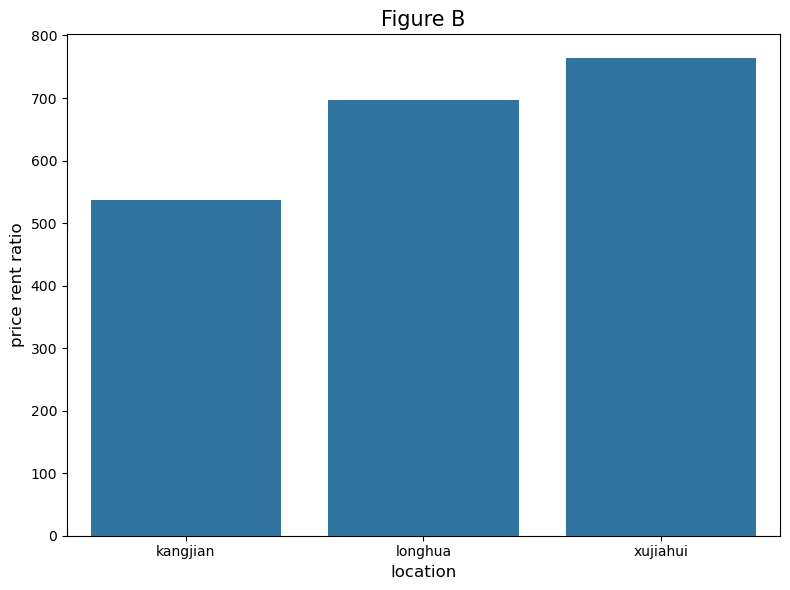

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ratio_with_linear_model_median, 
    x="位置", 
    y="房价租金比（线性模型）",   
    zorder=3  
)

plt.title("Figure B", fontsize=15)
plt.xlabel("location", fontsize=12)
plt.ylabel("price rent ratio", fontsize=12)
plt.tight_layout()
plt.show()

## Data science modeling pro max

We decide to include quadratic terms and interaction terms in the OLS model.

In [50]:
dfs=[sales, rent]
for df in dfs:
    df['面积平方']=df['面积']*df['面积']
    df['位置平方']=df['位置编码']*df['位置编码']
    df['交叉项']=df['面积']*df['位置编码']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\811558988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['面积平方']=df['面积']*df['面积']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\811558988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['位置平方']=df['位置编码']*df['位置编码']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\811558988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [51]:
def regression_promax(data):
    df = data.copy()
    X = sm.add_constant(df[['位置编码', '面积','面积平方','位置平方','交叉项']])  
    y = df['单价']  
    model = sm.OLS(y, X).fit()
    print(model.summary())  
    return model

In [52]:
model1_plus=regression_promax(sales)

                            OLS Regression Results                            
Dep. Variable:                     单价   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     627.9
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:19:46   Log-Likelihood:                -41086.
No. Observations:                3599   AIC:                         8.218e+04
Df Residuals:                    3593   BIC:                         8.222e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.024e+04   3230.263     -9.361      0.0

In [53]:
model2_plus=regression_promax(rent)

                            OLS Regression Results                            
Dep. Variable:                     单价   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          5.50e-110
Time:                        17:19:46   Log-Likelihood:                -16968.
No. Observations:                3328   AIC:                         3.395e+04
Df Residuals:                    3322   BIC:                         3.398e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5537      5.523      6.800      0.0

The $R^2$ of model+ is higher than that of model simply because it has more variables.

In [55]:
sales_X = sm.add_constant(sales[['位置编码', '面积', '面积平方','位置平方','交叉项']])
sales['预测租价（非线性模型）'] = model2_plus.predict(sales_X)
sales['房价租金比（非线性模型）'] = sales['单价'] / sales['预测租价（非线性模型）']

rent_X = sm.add_constant(rent[['位置编码', '面积', '面积平方','位置平方','交叉项']])
rent['预测卖价（非线性模型）'] = model1_plus.predict(rent_X)
rent['房价租金比（非线性模型）'] = rent['预测卖价（非线性模型）'] / rent['单价']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\607308859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['预测租价（非线性模型）'] = model2_plus.predict(sales_X)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21652\607308859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['房价租金比（非线性模型）'] = sales['单价'] / sales['预测租价（非线性模型）']


In [56]:
rent

,面积,价格,位置,单价,位置编码,预测卖价（线性模型）,房价租金比（线性模型）,面积平方,位置平方,交叉项,预测卖价（非线性模型）,房价租金比（非线性模型）
0,102.0,10800.0,xujiahui,105.882353,3,94707.739326,894.461983,10404.0,9,306.0,88114.375982,832.191329
1,41.0,5800.0,xujiahui,141.463415,3,80537.375077,569.315927,1681.0,9,123.0,75862.651325,536.270466
2,81.0,7500.0,xujiahui,92.592593,3,89829.417208,970.157706,6561.0,9,243.0,83835.223618,905.420415
3,44.0,4600.0,xujiahui,104.545455,3,81234.278236,777.023531,1936.0,9,132.0,76452.487875,731.284667
4,83.0,6600.0,xujiahui,79.518072,3,90294.019314,1135.515697,6889.0,9,249.0,84239.986784,1059.381652
...,...,...,...,...,...,...,...,...,...,...,...,...
3323,144.0,16500.0,kangjian,114.583333,1,78962.174121,689.124429,20736.0,1,144.0,69845.718230,609.562632
3324,101.0,13000.0,kangjian,128.712871,1,68973.228830,535.868932,10201.0,1,101.0,61653.059007,478.996843
3325,204.0,20000.0,kangjian,98.039216,1,92900.237317,947.582421,41616.0,1,204.0,81728.663466,833.632367
3326,181.0,23000.0,kangjian,127.071823,1,87557.313092,689.037986,32761.0,1,181.0,77111.385610,606.833078


In [57]:
sales_subset = sales[['位置', '房价租金比（非线性模型）']].copy()
rent_subset = rent[['位置', '房价租金比（非线性模型）']].copy()
ratio_with_nonlinear_model = pd.concat(
    [sales_subset, rent_subset],
    ignore_index=True  
)
ratio_with_nonlinear_model

,位置,房价租金比（非线性模型）
0,xujiahui,700.403905
1,xujiahui,727.999809
2,xujiahui,992.720034
3,xujiahui,955.777287
4,xujiahui,848.113368
...,...,...
6922,kangjian,609.562632
6923,kangjian,478.996843
6924,kangjian,833.632367
6925,kangjian,606.833078


## Figure C

In [59]:
ratio_with_nonlinear_model_median = ratio_with_nonlinear_model.groupby('位置').median()

In [60]:
ratio_with_nonlinear_model_median

,房价租金比（非线性模型）
位置,
kangjian,539.448950
longhua,716.675803
xujiahui,761.738006


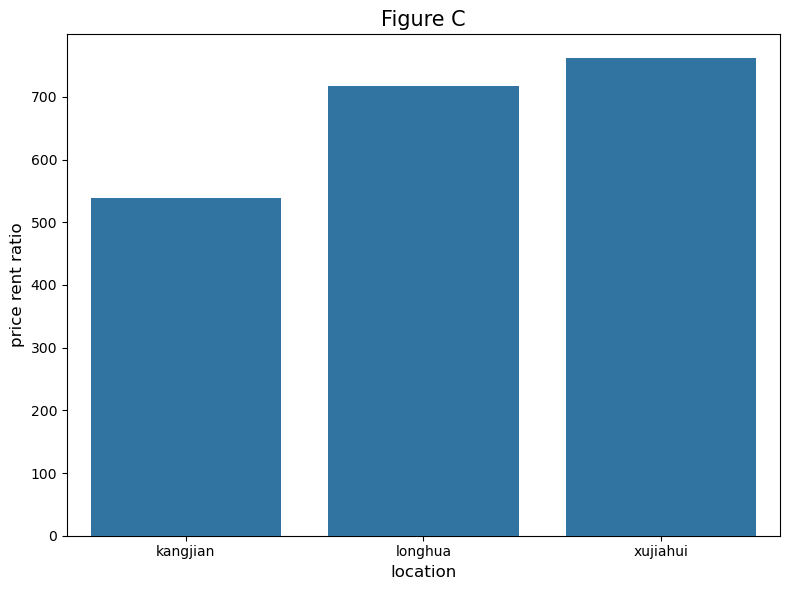

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ratio_with_nonlinear_model_median, 
    x="位置", 
    y="房价租金比（非线性模型）",   
    zorder=3  
)

plt.title("Figure C", fontsize=15)
plt.xlabel("location", fontsize=12)
plt.ylabel("price rent ratio", fontsize=12)
plt.tight_layout()
plt.show()

Based on the sample size, I think we should trust the 3rd method because after predicting for each data, the sample becomes twice as large as before.